In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

import solt
import solt.transforms as slt

In [4]:
def vis_img_mask(img, m):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img)
    ax.imshow(np.ma.masked_array(m, m==0), cmap='tab20', alpha=1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [20]:
img = cv2.cvtColor(cv2.imread('data/TCGA_CS_4941_19960909_16.tif')[:, :, 0], cv2.COLOR_GRAY2BGR)
mask = cv2.imread('data/TCGA_CS_4941_19960909_16_mask.tif', 0)

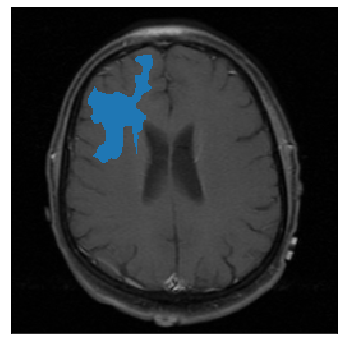

In [21]:
vis_img(img, mask)

In [42]:
stream = solt.Stream([
    slt.Rotate(angle_range=(-180, 180), p=1, padding='z'),
    slt.Pad(300),
    slt.Flip(0.5, 1),
    slt.Shear(range_x=(-0.2, 0.2), p=1, padding='z'),
    slt.Crop((256, 256), 'r'),
    solt.SelectiveStream([
        slt.GammaCorrection(gamma_range=0.5, p=1),
        slt.Noise(gain_range=0.2, p=1),
        solt.SelectiveStream([
            slt.Blur(blur_type='g', p=1),
            slt.Blur(blur_type='m', p=1)
        ])
        
    ], n=3)
])

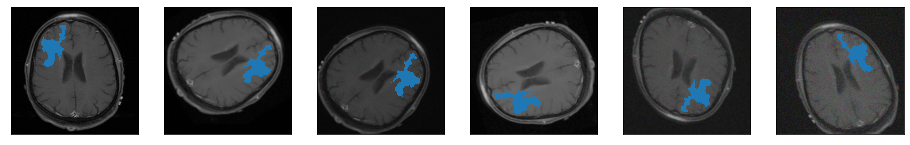

In [44]:
fig = plt.figure(figsize=(16,16))
n_augs = 6


random.seed(42)
for i in range(n_augs):
    img_aug, mask_aug = stream({'image': img, 'mask': mask}, return_torch=False).data

    ax = fig.add_subplot(1,n_augs,i+1)
    if i == 0:
        ax.imshow(img)
        ax.imshow(np.ma.masked_array(mask, mask==0), cmap='tab20', alpha=1)    
    else:
        ax.imshow(img_aug)
        ax.imshow(np.ma.masked_array(mask_aug, mask_aug==0), cmap='tab20', alpha=1)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('results/brain_mri.png', bbox_inches='tight')
plt.show()